In [11]:
import sys
sys.path.insert(0, "/home/ubuntu/data/code/Modules/")
import skimage
import numpy as np
import pickle
import gc
from albumentations import Compose,HorizontalFlip, VerticalFlip, ToFloat
from sklearn.metrics import confusion_matrix
import cv2
import matplotlib.pyplot as plt
from keras import backend
from keras.models import Sequential
from keras.losses import binary_crossentropy
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, BatchNormalization, Flatten, Dropout
from keras.optimizers import SGD,Adadelta, RMSprop, Adam
import DataGenerator
from albumentations import Compose,HorizontalFlip, VerticalFlip, ToFloat
from sklearn.model_selection import KFold
import random
import glob
import CNN_Module as cnn_module
import models
import time

In [12]:
import pickle
import numpy as np
result_cipro = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_final_cipro.p','rb'))
#print(result_cipro[0])
cipro_val_acc = result_cipro[0]
cipro_avg = np.mean(cipro_val_acc, axis = 0)
cipro_std = np.std(cipro_val_acc,axis=0)

cipro_avg_cut = cipro_avg[:25]
cipro_std_cut = cipro_std[:25]
print(len(cipro_avg_cut))
print(cipro_avg_cut)

result_ceph = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_ceph5.p','rb'))
ceph_val_acc = result_ceph[0]
ceph_avg = np.mean(ceph_val_acc, axis = 0)
ceph_std = np.std(ceph_val_acc,axis=0)
print(ceph_avg)

result_trim = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_trim.p','rb'))
trim_val_acc = result_trim[0]
trim_avg = np.mean(trim_val_acc, axis = 0)
trim_std = np.std(trim_val_acc,axis=0)
print(trim_avg)

25
[0.63008559 0.66578078 0.65856607 0.6628979  0.66397748 0.70442643
 0.70543994 0.70456006 0.71074474 0.74467417 0.73407658 0.71326727
 0.72443544 0.75539039 0.75324024 0.74230931 0.7267988  0.74082432
 0.76027177 0.75407357 0.72886637 0.74697447 0.75274474 0.7184024
 0.73136637]
[0.67696078 0.71323529 0.74934641 0.71683007 0.73006536 0.80653595
 0.79836601 0.74153595 0.73771242 0.7875817  0.75539216 0.8003268
 0.73937908 0.80196078 0.7745098  0.7777451  0.7879085  0.81862745
 0.77173203 0.80669935 0.75833333 0.81388889 0.79379085 0.76944444
 0.78823529]
[0.64529895 0.70566142 0.71472575 0.75009831 0.72229028 0.75676548
 0.7370614  0.75846693 0.74444949 0.76672716 0.76594323 0.75752924
 0.76416112 0.76057925 0.75835098 0.75939201 0.75545221 0.76119177
 0.76227818 0.7475247  0.76190512 0.77127193 0.76835804 0.75175943
 0.75043356]


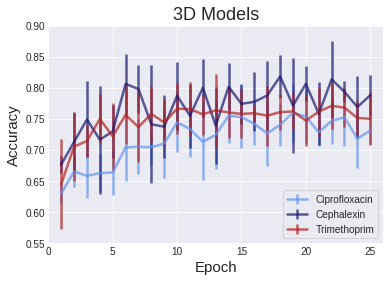

In [13]:
x_vals=np.arange(1,26)
plt.style.use('seaborn-darkgrid')

plt.errorbar(x_vals,cipro_avg_cut,cipro_std_cut,color='cornflowerblue',alpha=0.7,linewidth = 2.5, label='Ciprofloxacin')
plt.errorbar(x_vals,ceph_avg,ceph_std,color='midnightblue',alpha=0.7,linewidth = 2.5, label='Cephalexin')
plt.errorbar(x_vals,trim_avg,trim_std, color='firebrick',alpha=0.7,linewidth = 2.5, label='Trimethoprim')



plt.legend(loc='lower right',frameon=True, fontsize=10)
plt.title('3D Models', size = 18)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0.35, 85, 0.05))
plt.xlim(0,26)
plt.ylim(0.55,0.9)

plt.savefig('/home/ubuntu/data/code/final_graphs/a_3d_all', dpi=500)

In [14]:
import pickle
import numpy as np
result_cipro = pickle.load(open('/home/ubuntu/data/code/2dCNN/cipro_of2.p','rb'))
#print(result_cipro[0])
cipro_val_acc = result_cipro[1]
cipro_avg = np.mean(cipro_val_acc, axis = 0)
cipro_std = np.std(cipro_val_acc,axis=0)

cipro_avg_cut = cipro_avg[:25]
cipro_std_cut = cipro_std[:25]
print(len(cipro_avg_cut))
print(cipro_avg_cut)


result_ceph = pickle.load(open('/home/ubuntu/data/code/2dCNN/ceph_model2_lr001.p','rb'))
ceph_val_acc = result_ceph[1]
ceph_avg = np.mean(ceph_val_acc, axis = 0)
ceph_std = np.std(ceph_val_acc,axis=0)

ceph_avg_cut = ceph_avg[:25]
ceph_std_cut = ceph_std[:25]
print(len(ceph_avg_cut))
print(ceph_avg_cut)


result_trim = pickle.load(open('/home/ubuntu/data/code/2dCNN/trim_model2_lr005.p','rb'))
trim_val_acc = result_trim[1]
trim_avg = np.mean(trim_val_acc, axis = 0)
trim_std = np.std(trim_val_acc,axis=0)

trim_avg_cut = trim_avg[:25]
trim_std_cut = trim_std[:25]
print(len(trim_avg_cut))
print(trim_avg_cut)

25
[0.530358   0.63239796 0.68018364 0.66355133 0.7019094  0.70756287
 0.67419089 0.68735312 0.71955525 0.71973133 0.71860699 0.71029341
 0.71573215 0.71884663 0.72161324 0.71075723 0.73049457 0.71298358
 0.73258091 0.70789614 0.73730932 0.72450096 0.71707638 0.71008469
 0.71736412]
25
[0.62178313 0.65974672 0.71237939 0.71684004 0.73449231 0.76095281
 0.74393562 0.73422848 0.75409882 0.77028682 0.75283243 0.77094829
 0.76225124 0.78683288 0.77787766 0.76990615 0.78333333 0.79305556
 0.79222825 0.79561284 0.79306875 0.79578057 0.77754033 0.81249058
 0.8010836 ]
25
[0.6395424  0.70025146 0.71413304 0.70891228 0.73885819 0.7316345
 0.7339693  0.7353348  0.74345468 0.74248538 0.74121784 0.74623246
 0.75112135 0.72932749 0.76015497 0.75265497 0.75619298 0.75442836
 0.7555848  0.76419883 0.76037427 0.76952632 0.75416959 0.7633348
 0.75073538]


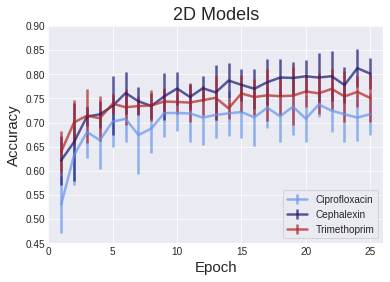

In [15]:
x_vals=np.arange(1,26)

plt.style.use('seaborn-darkgrid')

plt.errorbar(x_vals,cipro_avg_cut,cipro_std_cut,color='cornflowerblue',alpha=0.7,linewidth = 2.5, label='Ciprofloxacin')
plt.errorbar(x_vals,ceph_avg_cut,ceph_std_cut,color='midnightblue',alpha=0.7,linewidth = 2.5, label='Cephalexin')
plt.errorbar(x_vals,trim_avg_cut,trim_std_cut, color='firebrick',alpha=0.7,linewidth = 2.5, label='Trimethoprim')



plt.legend(loc='lower right',frameon=True, fontsize=10)
plt.title('2D Models', size = 18)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.yticks(np.arange(0.45, 85, 0.05))
plt.xlim(0,26)
plt.ylim(0.45,0.9)

plt.savefig('/home/ubuntu/data/code/final_graphs/a_2d_all_25cut', dpi=500)

In [12]:
import pickle
import numpy as np
result_cipro = pickle.load(open('/home/ubuntu/data/code/2dCNN/cipro_of2.p','rb'))
#print(result_cipro[0])
cipro_val_acc = result_cipro[1]
print(cipro_val_acc)
cipro_avg = np.mean(cipro_val_acc, axis = 0)
cipro_std = np.std(cipro_val_acc,axis=0)
print(cipro_std)

result_con_res = pickle.load(open('/home/ubuntu/data/code/2dCNN/rc_model1_lr001.p','rb'))
con_res_val_acc = result_con_res[1]
con_res_avg = np.mean(con_res_val_acc, axis = 0)
con_res_std = np.std(con_res_val_acc,axis=0)

result_con_sus = pickle.load(open('/home/ubuntu/data/code/2dCNN/cs_model1_lr001.p','rb'))
con_sus_val_acc = result_con_sus[1]
con_sus_avg = np.mean(con_sus_val_acc, axis = 0)
con_sus_std = np.std(con_sus_val_acc,axis=0)

[[0.6157407402390181, 0.6877104381118158, 0.6957070699544868, 0.6380471377586475, 0.6919191919568212, 0.7470538720789582, 0.7596801347052208, 0.7024410776041373, 0.7319023564006343, 0.7622053874186193, 0.7512626271657269, 0.7125420874417431, 0.735269360018499, 0.7718855221238401, 0.742424242725276, 0.7377946125813807, 0.764730639605209, 0.7904040404040404, 0.7655723905096753, 0.7243265987872475, 0.7638888888888888, 0.797558921680908, 0.7668350171485935, 0.7062289562414993, 0.7424242413329958, 0.8021885523892412, 0.7441077444589499, 0.7095959591444092, 0.7651515143989313, 0.7457912468323202], [0.5263605442430291, 0.6845238097772306, 0.738520408087239, 0.7219387753581514, 0.7589285711244661, 0.781037414636539, 0.7623299324923024, 0.7270408161364648, 0.7534013609877046, 0.764030612472977, 0.7772108841763468, 0.748299319905286, 0.747023810081336, 0.7729591830652587, 0.7810374150546838, 0.7274659861791499, 0.7512755097859368, 0.7610544216419969, 0.7767857144757802, 0.7308673466346702, 0.746

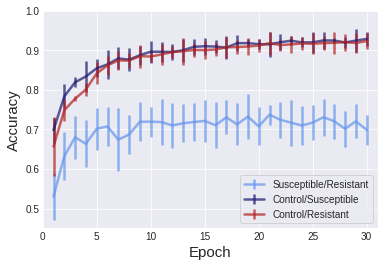

In [20]:
x_vals=np.arange(1,31)

plt.style.use('seaborn-darkgrid')

plt.errorbar(x_vals,cipro_avg,cipro_std,color='cornflowerblue',alpha=0.7,linewidth = 2.5, label='Susceptible/Resistant')
plt.errorbar(x_vals,con_sus_avg,con_sus_std,color='midnightblue',alpha=0.7,linewidth = 2.5, label='Control/Susceptible')
plt.errorbar(x_vals,con_res_avg,con_res_std, color='firebrick',alpha=0.7,linewidth = 2.5, label='Control/Resistant')



plt.legend(loc='lower right',frameon=True, fontsize=10)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Epoch', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.xlim(0,31)
plt.ylim(0.45,1)

#plt.savefig('/home/ubuntu/data/code/final_graphs/control_test1', dpi=500)

(0.5, 1.05)

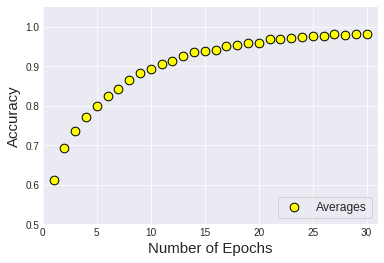

In [19]:
x_vals=np.arange(1,31)

#bests = [np.max(np.array(i)[:,1]) for i in data]
#stds = [np.std(np.array(i)[:,1]) for i in data]

plt.style.use('seaborn-darkgrid')

#plt.scatter(np.array(data)[:,0],np.array(data)[:,1],marker='x', alpha= 0.5, label='Individual runs',color='black')
plt.scatter(x_vals,acc_avg, marker='o', s= 75, label='Averages',color='yellow', edgecolors='black',linewidth=1)
#plt.errorbar(x_vals,data_av,std,elinewidth=2,color='maroon',label='std')
plt.legend(loc='lower right',frameon=True, fontsize=12)
#plt.title('Sample gap vs accuracy')
plt.xlabel('Number of Epochs', size = 15)
plt.ylabel('Accuracy', size = 15)
plt.xticks(np.arange(0, 35, 5))
plt.xlim(0,31)
plt.ylim(0.5,1.05)

#plt.savefig('/home/ubuntu/data/figs/2dk_cs_acc.png', dpi=500)

In [11]:
import pickle 
kfold_val_acc, all_preds = pickle.load(open('/home/ubuntu/data/code/3dCNN/3d_kfold_final_ceph2.p','rb'))

[0.69673203 0.72026144 0.70947712 0.75816993 0.74493464 0.7504902
 0.6870915  0.78464052 0.67222222 0.75915033 0.77679739 0.76486928
 0.78513072 0.77892157 0.77859477 0.74885621 0.76535948 0.76323529
 0.79918301 0.77990196 0.78611111 0.78039216 0.79330065 0.79820261
 0.76013072] [0.06350179 0.05014663 0.05404917 0.01641323 0.05069943 0.04742392
 0.11012029 0.04183007 0.13565576 0.05384328 0.05946321 0.04328801
 0.01774212 0.02539575 0.05146929 0.05017058 0.0450471  0.02904363
 0.03270995 0.01368653 0.02145071 0.04865716 0.04161056 0.03787186
 0.02793401]


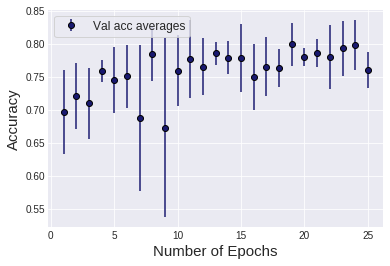

In [12]:
#plotting val acc averages with 
val_acc_avg = np.mean(kfold_val_acc, axis = 0)
val_acc_std = np.std(kfold_val_acc, axis = 0)
x_vals = np.arange(1,26)
print(val_acc_avg, val_acc_std)
plt.style.use('seaborn-darkgrid')
plt.errorbar(x_vals, val_acc_avg,val_acc_std, color='midnightblue', linewidth=2.5, elinewidth=1.5,fmt='o',mec='black', label = 'Val acc averages')
plt.legend(loc='upper left',frameon=True, fontsize=12)
plt.xlabel('Number of Epochs', size = 15)
plt.ylabel('Accuracy', size = 15)
#plt.xticks(np.arange(0, 25, 5))
#plt.ylim(0.4,1)

plt.show()

In [26]:
print('Accuracy')
(94+139)/(94+139+55)

Accuracy


0.8090277777777778

In [ ]:
test_predictions

In [ ]:
1264+176+95+745

In [ ]:
2009/2280

In [ ]:
sample_gap